# Part 1: The $\alpha - \beta - \gamma$ Filter 

## 1. Weighting a gold bar

In this example the weight of a gold bar will be estimated. <br>
For this we use a scale which adds random noise (meassurement error) when weighting the gold bar.

<img src="https://www.kalmanfilter.net/img/AlphaBeta/ex1_gold-1kilo.png">

We denote the gold bar as the system for the filter. <br>
The system's state will be the weight if the gold bar <br>
and the sysem's dynamic model will be constant since we assume that the goldbar won't change weight.

At time N, the estimate $x_{N,N}$ would be the average of all previous measurements.

$\hat{x}_{N,N}= \frac{1}{N} \left( z_{1}+ z_{2}+ \ldots + z_{N-1}+ z_{N} \right) = \frac{1}{N} \sum _{n=1}^{N} \left( z_{n} \right)$

Notations:<br>
$x$ true value of the weight<br>
$z_n$ measurement value of the weight at time n<br>
$\hat{x}_{n,n}$ estimate of x at time n (estimate is taken after measurement)<br>
$\hat{x}_{n,n-1}$ is the previous estimate of x that was made at time n−1 <br>
$\hat{x}_{n+1,n}$ estimate of the future state (n+1 ) of x. The estimate is made at the time n, right after the measurement zn. In other words, $\hat{x}_{n+1,n}$ is a predicted state



We have a constant dynamic model, thus:<br>
$x_{n+1,n} = x_{n,n}$
    

Alpha will be defined as:<br>
$\alpha _{n}= \frac{1}{n}$

To estimate $x_{N,N}$ we use the so called **State Update Equation**.<br>
$\hat{x}_{n,n}= \hat{x}_{n,n-1}+  \alpha _{n} \left( z_{n}-\hat{x}_{n,n-1} \right)$

The term $(z_{n}-\hat{x}_{n,n-1})$ is the "measurement" residual, also called the innovation. The innovation contains the new information.

The first estimate will be the **Initial Guess**, for this we simpy read the stamp on the goldbar.

A according implementation for 3 iterations would look like this:

In [1]:
# Imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# Function returns an np.array with random floats from a normal distribution with standard deviation 1.
# The mean for the normal distribution as well as the ammount of data points can be chosen freely.
def noisy_weight(weight):
    return np.random.normal(weight,2,1)[0]

In [3]:
# Every model needs an initial guess.
# The initial guess in this example is also the ground truth.
initial_guess = 1000 #gram
ground_truth = initial_guess

# Since the dynamic model is static the prediction equals the initialization.

# First Iteration
prediction1 = initial_guess
z1 = noisy_weight(ground_truth)
alpha1 = 1/1
estimation1 = prediction1+alpha1*(z1-prediction1)

#Second Iteration
prediction2 = estimation1
z2 = noisy_weight(ground_truth)
alpha2 = 1/2
estimation2 = prediction2+alpha2*(z2-prediction2)

# Third Iteration
prediction3 = estimation2
z3 = noisy_weight(ground_truth)
alpha3 = 1/3
estimation3 = prediction3+alpha3*(z3-prediction3)

print(f"First Estimation: {estimation1}")
print(f"Second Estimation: {estimation2}")
print(f"Thirds Estimation: {estimation3}")

First Estimation: 996.9596933951289
Second Estimation: 999.6908286964322
Thirds Estimation: 999.7903700009697


In the next block, the above filter will be put into a class with the initialization parameter:
- Initial Guess

The function .run(i) will then estimate the weight for i iterations.

In [4]:
class Filter:
    def __init__(self, initial_guess):
        
        #The ground truth in this example is also the initial guess
        self.ground_truth = initial_guess
        
        self.initial_guess = initial_guess
        self.estimation = self.initial_guess
        self.prediction = None
        self.measurement = None
        
        self.estimations = []
        self.measurements = []
        
        self.iterations = None
        
    def run(self,iterations):
        self.iterations = iterations
        for i in range(1,iterations+1):
            # Current prediction becomes previous estimate.
            self.prediction = self.estimation
            
            # Measurement with noise is taken of the prediction
            self.measurement = self.noisy_weight(self.ground_truth)
            self.measurements.append(self.measurement)
            
            #State Update Equation is applied.
            self.estimation = self.prediction+(1/i)*(self.measurement - self.prediction)
            self.estimations.append(self.estimation)
    
    def noisy_weight(self,weight):
        return np.random.normal(weight,20,1)[0]
    
    def print_results(self):
        try:
            print(f"True Value: {self.initial_guess}")
            print(f"Measurements: {self.measurements}")
            print(f"Estimations: {self.estimations}")
        except:
            print("Execute the .run() funtion first.")

    
    def plot_results(self):
        try:
            plt.plot(range(1,self.iterations+1),[self.ground_truth for i in range(self.iterations)],"r",self.measurements,"g",self.estimations,"b")
            ax = plt.gca()
            ax.set_ylim([np.floor(np.min(self.measurements)), np.ceil(np.max(self.measurements))])
            plt.legend(["Ground Truth","Measurements","Estimation"])
            ax.set_xlabel('Iterations')
            ax.set_ylabel('Weight in gram')
        except:
            print("Execute the .run() funtion first.")
        

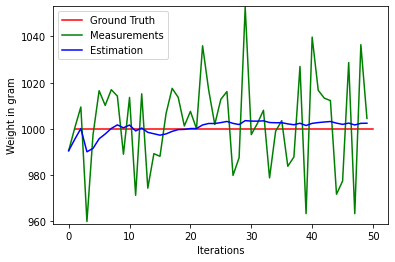

In [5]:
f = Filter(1000)
f.run(50)
f.plot_results()

We can see that our estimation algorithm has a smoothing effect on the measurements, and it converges towards the true value.ent 